In [29]:
import numpy as np 
import pandas as pd 
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#from statsmodels.stats.outliers_influence import variance_inflation_factor


In [30]:
df_prepared = pd.read_csv("../data/df_prepared.csv", index_col=0)
df_prepared.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,duration_sqrt,price
0,-1.368800,-1.732372,0.198274,-2.4911,0.236474,0.37094,-0.674351,2.375914,-1.742522,5953.0
1,-1.368800,-1.732372,-0.298600,-2.4911,0.445839,0.37094,-0.674351,2.375914,-1.691940,5953.0
2,-1.562898,-1.732372,-0.298600,-2.4911,-2.002790,0.37094,-0.674351,2.375914,-1.742522,5956.0
3,0.885018,-1.732372,0.469739,-2.4911,-0.820969,0.37094,-0.674351,2.375914,-1.717006,5955.0
4,0.885018,-1.732372,0.469739,-2.4911,0.445839,0.37094,-0.674351,2.375914,-1.691940,5955.0


In [31]:
X = df_prepared.drop('price', axis=1)
X.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,duration_sqrt
0,-1.368800,-1.732372,0.198274,-2.4911,0.236474,0.37094,-0.674351,2.375914,-1.742522
1,-1.368800,-1.732372,-0.298600,-2.4911,0.445839,0.37094,-0.674351,2.375914,-1.691940
2,-1.562898,-1.732372,-0.298600,-2.4911,-2.002790,0.37094,-0.674351,2.375914,-1.742522
3,0.885018,-1.732372,0.469739,-2.4911,-0.820969,0.37094,-0.674351,2.375914,-1.717006
4,0.885018,-1.732372,0.469739,-2.4911,0.445839,0.37094,-0.674351,2.375914,-1.691940


In [32]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

#check for issue with multicollinearity -> dont have (benchmark >= 5)

            feature       VIF
0           airline  1.499783
1       source_city  1.079051
2    departure_time  1.036798
3             stops  1.558686
4      arrival_time  1.074553
5  destination_city  1.096754
6             class  1.256327
7  days_left_binned  1.004452
8     duration_sqrt  1.799448


In [33]:
# X = df_final.drop('price', axis=1)
y = df_prepared['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_pred = rfr.predict(X_test)

In [36]:
y_pred

array([ 6308.3339513 , 54808.04108874,  3693.72579762, ...,
        5883.66139669,  4053.64147691,  4637.8592381 ])

In [37]:
mean_absolute_percentage_error=metrics.mean_absolute_percentage_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
r2=metrics.r2_score(y_test, y_pred)
adjustedr2 = 1 - (1-r2) * (len(y)-1)/(len(y)-X.shape[1]-1)


metric_results = {'Metric': ['R2 Score', 'Adjusted R2 Score','Root Mean Squared Error (RMSE)', 'Mean Absolute Percentage Error (MAPE)'],
        'Value': [round(r2, 5),round(adjustedr2, 5), round(np.sqrt(mse), 5), round(mean_absolute_percentage_error, 5)]}

df_metric = pd.DataFrame(metric_results)

print(df_metric)

                                  Metric       Value
0                               R2 Score     0.88633
1                      Adjusted R2 Score     0.88633
2         Root Mean Squared Error (RMSE)  7610.36723
3  Mean Absolute Percentage Error (MAPE)     0.30135


Without tuning: 
<li>Adjusted R2 still okay without tuning</li>
<li>RMSE means model is about 7610 indian currency off from actual</li>
<li>MAPE is scale independent, which is a good measure for us. 0.301 means about 30% off</li> 

<li>The scatter plot below compares the actual with the predicted. The closer the points are to a straight line, the better the model’s prediction</li>
<li>The Residual Plot below shows the residuals (differences between the predicted and actual) against the predicted values. A well-performing model will have residuals scattered randomly around zero (the red dashed line).</li>

https://dooinnkim.medium.com/how-to-plot-predicted-vs-actual-graphs-and-residual-plots-dc4e5b3f304a

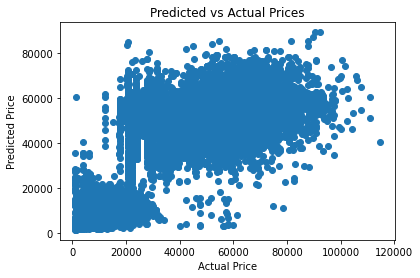

In [38]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices')
plt.show()

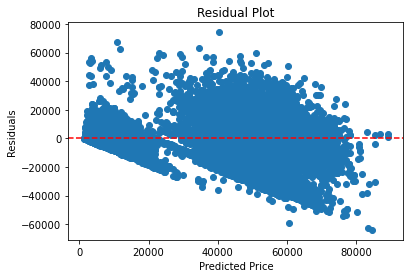

In [39]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()